In [1]:
from sys import path
from os.path import relpath, realpath, abspath, join, exists
from itertools import product

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

pd.set_option('display.max_rows', 999)

In [2]:
from torchnetjson.builder import build_net

In [3]:
from thesis_v2 import dir_dict
from thesis_v2.data import load_data_helper
from thesis_v2.training.training_aux import load_training_results
from thesis_v2.training_extra.misc import count_params
from thesis_v2.models.maskcnn_polished_with_local_pcn.builder import load_modules

load_modules()

In [4]:
folder_to_check = 'scripts/training/yuanyuan_8k_a_3day/maskcnn_polished_with_local_pcn'
path.insert(0, join(dir_dict['root'], folder_to_check))
from submit import param_iterator_obj
from key_utils import keygen

In [5]:
def load_everything():
    _df_collect = []
    for idx, param in enumerate(param_iterator_obj.generate()):
        if idx % 50 == 0:
            print(idx)
            
#         print(len(param))
        
        assert len(param) == 23
        assert param['split_seed'] == 'legacy'
        assert param['out_channel'] == 16
        assert param['num_layer'] == 2
        assert param['kernel_size_l1'] == 9
        assert param['pooling_ksize'] == 3
        assert param['pooling_type'] == 'avg'
        
#         assert param['model_seed'] == 0
        
        key = keygen(**{k: v for k, v in param.items() if k not in {'scale', 'smoothness'}})
        # 10 to go.
        result = load_training_results(key, return_model=False)
        # load twice, first time to get the model.
        result = load_training_results(key, return_model=True, model=build_net(result['config_extra']['model']))
        num_epochs = [len(x) for x in result['stats_all']]
        _df_collect.append(
            {
#                 'split_seed': str(param['split_seed']),
                
                
                'act_fn': param['act_fn'],
                'bn_before_act': param['bn_before_act'],
                'bn_after_fc': param['bn_after_fc'],
                'input_size': param['input_size'],
                'loss_type': param['loss_type'],
                
                # 12 to go
                
                'scale': float(param['scale']),
                # 
                'smoothness': float(param['smoothness']),
                # 
                
                # 8 to go
                'pcn_bn': param['pcn_bn'],
                'pcn_bn_post': param['pcn_bn_post'],
                'pcn_bypass': param['pcn_bypass'],
                'pcn_final_act': param['pcn_final_act'],
                'pcn_no_act': param['pcn_no_act'],
                'pcn_bias': param['pcn_bias'],
                
                'pcn_cls': param['pcn_cls'],
                
                'model_seed': param['model_seed'],
                
                'corr_test': result['stats_best']['stats']['test']['corr_mean'],
                'max_epoch': max(num_epochs),
                'num_param': count_params(result['model']),
            }
        )
        _df =  pd.DataFrame(_df_collect, columns=[
#             'split_seed',
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
            
            'corr_test', 'num_param',
            'max_epoch',
            
                                                 ])
        _df = _df.set_index([
            'act_fn', 'bn_before_act', 'bn_after_fc',
            'input_size', 'loss_type', 'scale',
            'smoothness',
            'pcn_bn', 'pcn_bn_post', 'pcn_bypass', 'pcn_final_act', 'pcn_no_act', 'pcn_bias', 'pcn_cls',
            'model_seed',
        ],verify_integrity=True)
    return _df

In [6]:
df = load_everything()

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150


In [7]:
corr_mean = df['corr_test'].unstack('model_seed').mean(axis=1)
corr_std = df['corr_test'].unstack('model_seed').std(axis=1)

In [8]:
corr_mean.unstack('pcn_cls')

pcn_cls                                                                                                                                        0  \
act_fn bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu   True          False       50         mse       0.01  0.000005   False  False       False      False         False      False     0.491293   
                                                                                                                              True      0.487756   
                                                                                                                   True       False     0.487825   
                                                                                                                              True      0.487897   
                                                                                                     True          False      False     0.491417   
                                                                                                                              True      0.489102   
                                                                                                                   True       False     0.491996   
                                                                                                                              True      0.487800   
                                                                                          True       False         False      False     0.496622   
                                                                                                                              True      0.497617   
                                                                                                                   True       False     0.482490   
                                                                                                                              True      0.486916   
                                                                                                     True          False      False     0.491492   
                                                                                                                              True      0.494397   
                                                                                                                   True       False     0.487562   
                                                                                                                              True      0.488141   
                                                                              True        False      False         False      False     0.514385   
                                                                                                                              True      0.512897   
                                                                                                                   True       False     0.503218   
                                                                                                                              True      0.501284   
                                                                                                     True          False      False     0.514390   
                                                                                                                              True      0.512757   
                                                                                                                   True       False     0.514385   
                                                                                                                              True      0.512757   
                                                                                          True       False         False      False     0.515596   
    

In [9]:
corr_std.unstack('pcn_cls')
# std is small. no problem. big problem is comparing different cls.

pcn_cls                                                                                                                                        0  \
act_fn bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_bypass pcn_final_act pcn_no_act pcn_bias             
relu   True          False       50         mse       0.01  0.000005   False  False       False      False         False      False     0.001618   
                                                                                                                              True      0.007928   
                                                                                                                   True       False     0.003394   
                                                                                                                              True      0.002397   
                                                                                                     True          False      False     0.002201   
                                                                                                                              True      0.005612   
                                                                                                                   True       False     0.002233   
                                                                                                                              True      0.007960   
                                                                                          True       False         False      False     0.004327   
                                                                                                                              True      0.002457   
                                                                                                                   True       False     0.004559   
                                                                                                                              True      0.006122   
                                                                                                     True          False      False     0.007978   
                                                                                                                              True      0.002788   
                                                                                                                   True       False     0.007745   
                                                                                                                              True      0.000483   
                                                                              True        False      False         False      False     0.003235   
                                                                                                                              True      0.001248   
                                                                                                                   True       False     0.000590   
                                                                                                                              True      0.003672   
                                                                                                     True          False      False     0.003238   
                                                                                                                              True      0.001289   
                                                                                                                   True       False     0.003235   
                                                                                                                              True      0.001289   
                                                                                          True       False         False      False     0.003602   
    

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

def scatter(x, y, xlabel, ylabel, title):
    
    # only check high performing cases.
    selector = np.logical_and(x>=0.5, y>=0.5)
    x=x[selector]
    y=y[selector]
    
    plt.close('all')
    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, s=1)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.xlim(0.5,0.55)
    plt.ylim(0.5,0.55)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title(title)
    plt.show()
    print('y-x mean', (y-x).mean(), 'y-x>0 mean', ((y-x)>0).mean())
    print('y top', y.max(), 'x top', x.max())

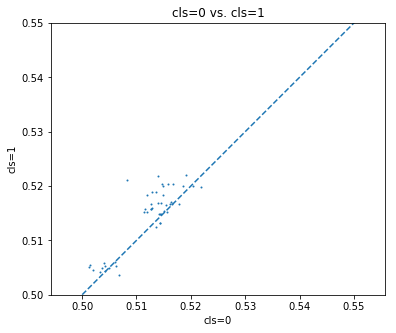

y-x mean 0.002174898361166316 y-x>0 mean 0.8125
y top 0.5219766696294149 x top 0.5218437910079956


In [11]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,1], 'cls=0', 'cls=1', 'cls=0 vs. cls=1')

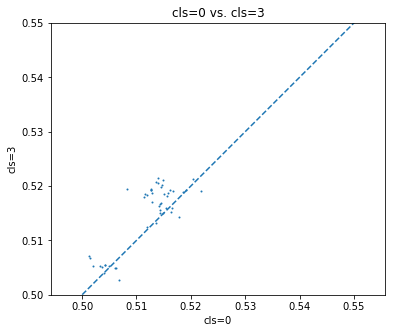

y-x mean 0.0027417830295032954 y-x>0 mean 0.8125
y top 0.5215622981389364 x top 0.5218437910079956


In [12]:
scatter(corr_mean.unstack('pcn_cls').values[:,0], corr_mean.unstack('pcn_cls').values[:,3], 'cls=0', 'cls=3', 'cls=0 vs. cls=3')

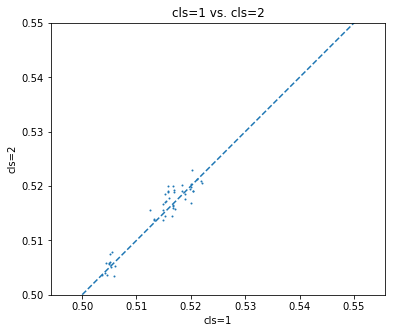

y-x mean 0.000570679497387668 y-x>0 mean 0.5625
y top 0.5229024291038513 x top 0.5219766696294149


In [13]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,2], 'cls=1', 'cls=2', 'cls=1 vs. cls=2')

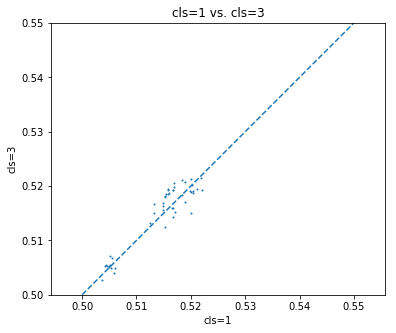

y-x mean 0.0005668846683369796 y-x>0 mean 0.6041666666666666
y top 0.5215622981389364 x top 0.5219766696294149


In [14]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,3], 'cls=1', 'cls=3', 'cls=1 vs. cls=3')

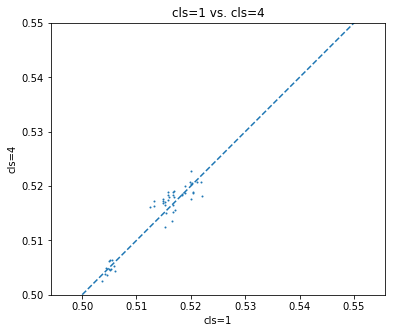

y-x mean 0.00043898551828331495 y-x>0 mean 0.5625
y top 0.522827168305715 x top 0.5219766696294149


In [15]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,4], 'cls=1', 'cls=4', 'cls=1 vs. cls=4')

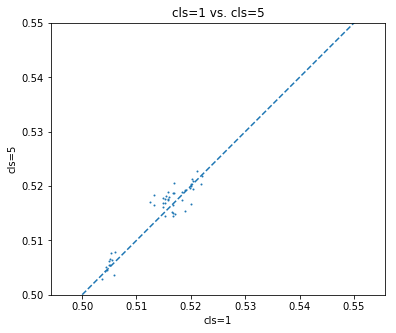

y-x mean 0.0006997297621435666 y-x>0 mean 0.6875
y top 0.5228338638941447 x top 0.5219766696294149


In [16]:
scatter(corr_mean.unstack('pcn_cls').values[:,1], corr_mean.unstack('pcn_cls').values[:,5], 'cls=1', 'cls=5', 'cls=1 vs. cls=5')

In [17]:
def plot_step_increase(pairs_to_check):
    # remove those no innner act ones.
    df_unstacked = corr_mean.xs(False, level='pcn_no_act').xs(False, level='pcn_bypass').xs(True, level='pcn_bias').unstack('pcn_cls')
#     df_unstacked = corr_mean.unstack('pcn_cls')
    print(df_unstacked.shape)
    
#     selector = df_unstacked.values[:,0] >= 0.50
    selector = ()
#     print(selector.mean())
    
    cls_values = df_unstacked.columns.values.tolist()
    print(cls_values)
    assert cls_values == list(range(len(cls_values)))
    
    for p1, p2 in pairs_to_check:
        val0 = df_unstacked.values[:,p1][selector]
        val1 = df_unstacked.values[:,p2][selector]

        # selection
        
        print(f'{p2} - {p1}', 'mean', (val1-val0).mean(), 'std', (val1-val0).std())
# trend for 0-1-2 is good. then bad.
plot_step_increase([(0,1),(1,2),(2,3),(3,5),(2,5)])

(8, 6)
[0, 1, 2, 3, 4, 5]
1 - 0 mean 0.003446028878291457 std 0.004194586656506915
2 - 1 mean 0.0005079420904318399 std 0.0028378012033019205
3 - 2 mean 9.631862243017486e-05 std 0.0008893687168522057
5 - 3 mean -0.0005310115714867863 std 0.0020942778713161207
5 - 2 mean -0.0004346929490566115 std 0.0014445426662687308


In [18]:
corr_mean.xs(False, level='pcn_no_act').xs(False, level='pcn_bypass').xs(True, level='pcn_bias').unstack('pcn_cls')

pcn_cls                                                                                                         0  \
act_fn bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_final_act             
relu   True          False       50         mse       0.01  0.000005   False  False       False          0.487756   
                                                                                          True           0.489102   
                                                                              True        False          0.512897   
                                                                                          True           0.512757   
                                                                       True   False       False          0.511536   
                                                                                          True           0.508198   
                                                                              True        False          0.511447   
                                                                                          True           0.514912   

pcn_cls                                                                                                         1  \
act_fn bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_final_act             
relu   True          False       50         mse       0.01  0.000005   False  False       False          0.487160   
                                                                                          True           0.486748   
                                                                              True        False          0.515941   
                                                                                          True           0.515765   
                                                                       True   False       False          0.515781   
                                                                                          True           0.521110   
                                                                              True        False          0.515309   
                                                                                          True           0.518360   

pcn_cls                                                                                                         2  \
act_fn bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_final_act             
relu   True          False       50         mse       0.01  0.000005   False  False       False          0.484468   
                                                                                          True           0.481427   
                                                                              True        False          0.517746   
                                                                                          True           0.519127   
                                                                       True   False       False          0.518868   
                                                                                          True           0.521241   
                                                                              True        False          0.517086   
                                                                                          True           0.520275   

pcn_cls                                                                                                         3  \
act_fn bn_before_act bn_after_fc input_size loss_type scale smoothness pcn_bn pcn_bn_post pcn_final_act             
relu   True          False       50         mse       0.01  0.000005   False  False       False          0.485067   
                                                                                          True           0.480849   
                   